### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path

path = r'/Users/laceymarchment/Desktop/Instacart Basket Analysis'

In [4]:
# Import merged profiles dataframe which is the reduced 

df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_profiles_merged.pkl'))

In [3]:
# Import merged dataframe

df_customers_merged = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'merge_large.pkl'))

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# Drop PII columns 

df_pii = df_customers_merged.drop(columns=['First Name', 'Surname'])

In [12]:
df_customers_merged.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name_x',
       'aisle_id_x', 'department_id_x', 'prices_x', 'exists', 'Unnamed: 0',
       'product_name_y', 'aisle_id_y', 'department_id_y', 'prices_y', 'exist',
       'max_order', 'loyalty_flag', 'Average_spending', 'spending_flag',
       'Median_days_since_prior_order', 'frequency_flag', 'First Name',
       'Surname', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', '_merge'],
      dtype='object')

In [5]:
del df_customers_merged['First Name']

In [6]:
del df_customers_merged['Surname']

In [16]:
df_customers_merged.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name_x',
       'aisle_id_x', 'department_id_x', 'prices_x', 'exists', 'Unnamed: 0',
       'product_name_y', 'aisle_id_y', 'department_id_y', 'prices_y', 'exist',
       'max_order', 'loyalty_flag', 'Average_spending', 'spending_flag',
       'Median_days_since_prior_order', 'frequency_flag', 'Gender', 'State',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
### - Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
### - Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
# Create column 'Region' using a for loop

result = []

for value in df_customers_merged["State"]:
    if (value == "Maine" or value=="New Hampshire" or value=="Vermont" or value=="Massachusetts" or value=="Rhode Island" or value=="Connecticut" or value=="New York" or value=="Pennsylvania" or value=="New Jersey"):
        result.append("Northeast")
    elif (value == "Wisconsin" or value=="Michigan" or value=="Illinois" or value=="Indiana" or value=="Ohio" or value=="North Dakota" or value=="South Dakota" or value=="Nebraska" or value=="Kansas" or value=="Minnesota" or value=="Iowa" or value=="Missouri"):
        result.append("Midwest")
    elif (value == "Delaware" or value== "Maryland" or value== "District of Columbia" or value== "Virginia" or value== "West Virginia" or value== "North Carolina" or value== "South Carolina" or value== "Georgia" or value== "Florida" or value== "Kentucky" or value== "Tennessee" or value== "Mississippi" or value== "Alabama" or value== "Oklahoma" or value== "Texas" or value== "Arkansas" or value== "Louisiana"):
        result.append("South")
    elif (value == "Idaho" or value== "Montana" or value== "Wyoming" or value== "Nevada" or value== "Utah" or value== "Colorado" or value== "Arizona" or value== "New Mexico" or value== "Alaska" or value== "Washington" or value== "Oregon" or value== "California" or value== "Hawaii"):
        result.append("West")
    else:
        result.append("Not Enough Data")

In [8]:
# Create 

df_customers_merged['Region'] = result

In [9]:
# Check frequency

df_customers_merged['Region'].value_counts(dropna=False)

South        10801567
West          8300413
Midwest       7603860
Northeast     5728330
Name: Region, dtype: int64

In [10]:
# Create crosstab for 'Region' column and 'spending_flag'

crosstab = pd.crosstab(df_customers_merged['Region'], df_customers_merged['spending_flag'], dropna = False)

In [11]:
# Copy crosstab to clipboard 

crosstab.to_clipboard()

In [12]:
# View crosstab

crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,156047,7447813
Northeast,108341,5619989
South,210144,10591423
West,160771,8139642


### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [13]:
# Check shape of dateframe

df_customers_merged.shape

(32434170, 37)

In [14]:
# Create 'If' statement using loc() function for low activity customers

df_customers_merged.loc[df_customers_merged['order_number'] < 5, 'Activity_Flag'] = 'Low_Activity'

In [15]:
# Create 'If' statement using loc() function for high activity customers

df_customers_merged.loc[df_customers_merged['order_number'] > 5, 'Activity_Flag'] = 'High_Activity'

In [16]:
# Check frequency of 'Activity_Flag' column

df_customers_merged['Activity_Flag'].value_counts(dropna=False)

High_Activity    22808339
Low_Activity      7997415
NaN               1628416
Name: Activity_Flag, dtype: int64

In [17]:
# Create Low_Activity dataframe

df_low_activity = df_customers_merged[df_customers_merged.Activity_Flag == 'Low_Activity']

In [18]:
# Check frequency of Low_Activity dataframe 

df_low_activity ['Activity_Flag'].value_counts(dropna= False)

Low_Activity    7997415
Name: Activity_Flag, dtype: int64

In [19]:
# Export df_low_activity 

df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'df_low_activity.pkl'))

In [20]:
# Exclude Low_Activity customers from dataframe

df_customers_merged = df_customers_merged[df_customers_merged.Activity_Flag == 'High_Activity']

In [23]:
# Check df_customers_merged shape

df_customers_merged.shape

(22808339, 38)

In [25]:
# Export df_customers_merged to save progress

df_customers_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'df_high_activity.pkl'))

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependants. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [4]:
# Import dataframe

df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_high_activity.pkl'))

In [30]:
# Import department dataframe

df_dep = pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [31]:
# View department dataframe

df_dep_t = df_dep.T

df_dep_t 

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [32]:
# Create baby profile

baby = pd.crosstab(df['user_id'], df['department_id_x'] == 18, dropna=False )

In [33]:
baby

department_id_x,False,True
user_id,,
1,30,0
2,145,0
3,47,0
7,123,0
11,32,0
...,...,...
206202,147,0
206206,271,0
206207,134,0


In [34]:
# Move to excel for further manipulation

baby.to_clipboard()

In [4]:
# Import profile.csv from excel

df_baby = pd.read_csv(r'/Users/laceymarchment/Desktop/profile.csv')

In [5]:
df_baby

,user_id,baby_profile
0,1,No Baby
1,2,No Baby
2,3,No Baby
3,7,No Baby
4,11,No Baby
...,...,...
146463,206202,No Baby
146464,206206,No Baby
146465,206207,No Baby
146466,206208,Baby


In [53]:
# Check frequency 

df_baby['baby_profile'].value_counts(dropna= False)

No Baby    122587
Baby        23881
Name: baby_profile, dtype: int64

In [7]:
# Merge df_baby with df

df = df.merge(df_baby, on = 'user_id', indicator = True)

In [7]:
# Drop _merge colummn

df_profiles = df.drop(columns = ['_merge'])

In [6]:
# Reduce storage for columns

df['order_number'] = df["order_number"].astype("int8")
df['order_dow'] = df["order_dow"].astype("int8")
df['order_hour_of_day'] = df["order_hour_of_day"].astype("int8")
df['days_since_prior_order'] = df["days_since_prior_order"].astype("int8")
df['add_to_cart_order'] = df["add_to_cart_order"].astype("int8")
df['reordered'] = df["reordered"].astype("int8")
df['Age'] = df["Age"].astype("int8")
df['n_dependants'] = df["n_dependants"].astype("int8")

In [23]:
df_profiles_merged['baby_profile'].value_counts(dropna= False)

No Baby    15432347
Baby        7375992
Name: baby_profile, dtype: int64

In [21]:
# Export df

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_profiles_merged.pkl'))

In [ ]:
# Export df

df_baby.to_pickle(r'/Users/laceymarchment/Desktop/baby.pkl')

#### Income Variable

In [13]:
df['income'].describe()

count    2.280834e+07
mean     9.996822e+04
std      4.339390e+04
min      2.590300e+04
25%      6.762800e+04
50%      9.686200e+04
75%      1.281820e+05
max      5.939010e+05
Name: income, dtype: float64

In [14]:
# 

df['income_profile'] = df.groupby(['user_id'])['income'].transform('max')

In [15]:
df.head(1)

,Unnamed: 0_x,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,State,Age,date_joined,n_dependants,fam_status,income,Region,Activity_Flag,baby_profile,income_profile
0,5,3367565,1,6,2,7,19,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,No Baby,40423


In [16]:
#

df.loc[df['income_profile'] <= 67628, 'income_flag'] = 'Lower Income'

In [17]:
#

df.loc[(df['income_profile'] < 128182) & (df['income_profile'] > 67628), 'income_flag'] = 'Average Income'

In [18]:
# 

df.loc[df['income_profile'] >= 128182, 'income_flag'] = 'Higher Income'

In [19]:
#

df['income_flag'].value_counts(dropna= False)

Average Income    11403868
Higher Income      5702302
Lower Income       5702169
Name: income_flag, dtype: int64

In [ ]:
# create .loc for each variable 
# merge each variable main df OR create new df with columns needed (by dropping all other columns)
# look at bar graphs for each variable - q6. 
# hour of day and da of week for for each variable to answer q7.

In [21]:
#

income = pd.crosstab(df['user_id'], df['income_flag'], dropna=False)

In [22]:
income

income_flag,Average Income,Higher Income,Lower Income
user_id,,,
1,0,0,30
2,0,0,145
3,47,0,0
7,123,0,0
11,0,32,0
...,...,...,...
206202,147,0,0
206206,271,0,0
206207,134,0,0


In [25]:
# to_clipboard() means copy n paste into excel

income.to_clipboard()

In [24]:
# Import income.csv

In [26]:
df.head(10)

,Unnamed: 0_x,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,State,Age,date_joined,n_dependants,fam_status,income,Region,Activity_Flag,income_profile,income_flag
5,5,3367565,1,6,2,7,19,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,40423,Lower Income
6,6,550135,1,7,1,9,20,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,40423,Lower Income
7,7,3108588,1,8,1,14,14,196,2,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,40423,Lower Income
8,8,2295261,1,9,1,16,0,196,4,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,40423,Lower Income
9,9,2550362,1,10,4,8,30,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,40423,Lower Income
10,144,2968173,15,15,1,9,7,196,2,0,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High_Activity,54313,Lower Income
11,146,1870022,15,17,2,16,8,196,6,1,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High_Activity,54313,Lower Income
12,147,1911383,15,18,2,11,7,196,1,1,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High_Activity,54313,Lower Income
13,150,2715276,15,21,1,9,7,196,1,1,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High_Activity,54313,Lower Income
14,151,487368,15,22,1,10,14,196,1,1,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High_Activity,54313,Lower Income


In [4]:
df.head()

,Unnamed: 0_x,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,n_dependants,fam_status,income,Region,Activity_Flag,baby_profile,income_profile,income_flag
0,5,3367565,1,6,2,7,19,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,No Baby,40423,Lower Income
1,6,550135,1,7,1,9,20,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,No Baby,40423,Lower Income
2,7,3108588,1,8,1,14,14,196,2,1,...,31,2/17/2019,3,married,40423,South,High_Activity,No Baby,40423,Lower Income
3,8,2295261,1,9,1,16,0,196,4,1,...,31,2/17/2019,3,married,40423,South,High_Activity,No Baby,40423,Lower Income
4,9,2550362,1,10,4,8,30,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,No Baby,40423,Lower Income


In [11]:
# Drop _merge colummn

df = df.drop(columns = ['_merge'])

#### Age Variable

In [5]:
#

df['Age'].describe()

count    2.280834e+07
mean     4.945698e+01
std      1.848496e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [6]:
# Create 'age' flag

df['age_profile'] = df.groupby(['user_id'])['Age'].transform('max')

In [18]:
df.loc[df['Age'] <= 33, 'Age_Profile'] = 'Younger'

In [19]:
df.loc[(df['Age'] < 65) & (df['Age'] > 33), 'Age_Profile'] = 'Middle Aged'

In [20]:
df.loc[df['Age'] >= 65, 'Age_Profile'] = 'Mature Aged'

In [21]:
df['Age_Profile'].value_counts(dropna= False)

Middle Aged    11063614
Mature Aged     6033392
Younger         5711333
Name: Age_Profile, dtype: int64

In [22]:
df.head()

,Unnamed: 0_x,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,n_dependants,fam_status,income,Region,Activity_Flag,baby_profile,income_profile,income_flag,age_profile,Age_Profile
0,5,3367565,1,6,2,7,19,196,1,1,...,3,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger
1,6,550135,1,7,1,9,20,196,1,1,...,3,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger
2,7,3108588,1,8,1,14,14,196,2,1,...,3,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger
3,8,2295261,1,9,1,16,0,196,4,1,...,3,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger
4,9,2550362,1,10,4,8,30,196,1,1,...,3,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger


#### Number of Dependants Variable

In [23]:
#

df['n_dependants'].describe()

count    2.280834e+07
mean     1.502083e+00
std      1.119325e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [24]:
# Create 'family_size' flag

df['family_size'] = df.groupby(['user_id'])['n_dependants'].transform('max')

In [25]:
df.loc[df['n_dependants'] <= 1, 'family_size'] = 'Small Family'

In [29]:
df.loc[(df['n_dependants'] == 2), 'family_size'] = 'Medium Family'

In [28]:
df.loc[df['n_dependants'] >= 3, 'family_size'] = 'Large Family'

In [30]:
#

df['family_size'].value_counts(dropna= False)

Small Family     11384228
Large Family      5732363
Medium Family     5691748
Name: family_size, dtype: int64

In [32]:
df.head()

,Unnamed: 0_x,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,fam_status,income,Region,Activity_Flag,baby_profile,income_profile,income_flag,age_profile,Age_Profile,family_size
0,5,3367565,1,6,2,7,19,196,1,1,...,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger,Large Family
1,6,550135,1,7,1,9,20,196,1,1,...,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger,Large Family
2,7,3108588,1,8,1,14,14,196,2,1,...,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger,Large Family
3,8,2295261,1,9,1,16,0,196,4,1,...,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger,Large Family
4,9,2550362,1,10,4,8,30,196,1,1,...,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger,Large Family


In [33]:
# Export df

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_profiles_merged.pkl'))

In [34]:
# Create new df with variables

df_profiles = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_profiles_merged.pkl'))

In [35]:
df_profiles.head()

,Unnamed: 0_x,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,fam_status,income,Region,Activity_Flag,baby_profile,income_profile,income_flag,age_profile,Age_Profile,family_size
0,5,3367565,1,6,2,7,19,196,1,1,...,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger,Large Family
1,6,550135,1,7,1,9,20,196,1,1,...,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger,Large Family
2,7,3108588,1,8,1,14,14,196,2,1,...,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger,Large Family
3,8,2295261,1,9,1,16,0,196,4,1,...,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger,Large Family
4,9,2550362,1,10,4,8,30,196,1,1,...,married,40423,South,High_Activity,No Baby,40423,Lower Income,31,Younger,Large Family


In [36]:
df_profiles.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name_x',
       'aisle_id_x', 'department_id_x', 'prices_x', 'exists', 'Unnamed: 0',
       'product_name_y', 'aisle_id_y', 'department_id_y', 'prices_y', 'exist',
       'max_order', 'loyalty_flag', 'Average_spending', 'spending_flag',
       'Median_days_since_prior_order', 'frequency_flag', 'Gender', 'State',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'Region',
       'Activity_Flag', 'baby_profile', 'income_profile', 'income_flag',
       'age_profile', 'Age_Profile', 'family_size'],
      dtype='object')

In [42]:
df_profiles = df_profiles.drop(columns = ['order_id', 'order_number', 'income_profile', 'age_profile'])

In [44]:
df_profiles.head()

,user_id,order_dow,order_hour_of_day,days_since_prior_order,Region,baby_profile,income_flag,Age_Profile,family_size
0,1,2,7,19,South,No Baby,Lower Income,Younger,Large Family
1,1,1,9,20,South,No Baby,Lower Income,Younger,Large Family
2,1,1,14,14,South,No Baby,Lower Income,Younger,Large Family
3,1,1,16,0,South,No Baby,Lower Income,Younger,Large Family
4,1,4,8,30,South,No Baby,Lower Income,Younger,Large Family


In [45]:
# Export df

df_profiles.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_profiles.pkl'))

### 6. Create an appropriate visualization to show the distribution of profiles.

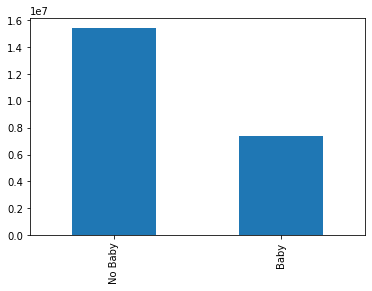

In [46]:
# Create baby_profile bar grapgh

bar_baby = df_profiles['baby_profile'].value_counts().plot.bar()

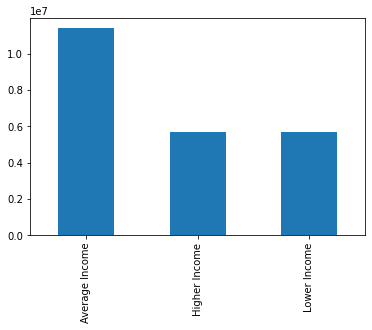

In [47]:
# Create income_flag bar grapgh

bar_income = df_profiles['income_flag'].value_counts().plot.bar()

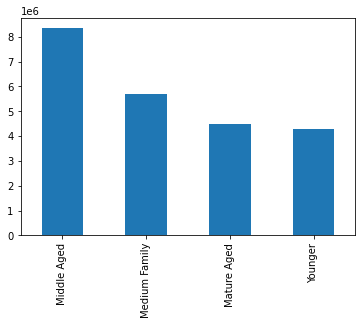

In [49]:
# Create Age_Profile bar grapgh

bar_age = df_profiles['Age_Profile'].value_counts().plot.bar()

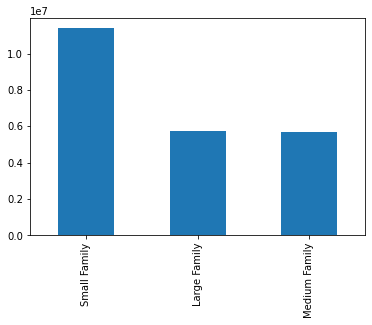

In [50]:
# Create family_size bar grapgh

bar_family = df_profiles['family_size'].value_counts().plot.bar()

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [51]:
# Import df_profiles_merged

df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_profiles_merged.pkl'))

In [53]:
# Baby_profile - Do households differ with order_dow depending on whether they have a baby?

df.groupby('baby_profile').agg({'order_dow':['mean', 'min', 'max']})

order_dow        
                  mean min max
baby_profile                  
Baby          2.747571   0   6
No Baby       2.750124   0   6

In [54]:
# Baby_profile - Do households differ with order_hour_of_day depending on whether they have a baby?

df.groupby('baby_profile').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                          mean min max
baby_profile                          
Baby                 13.397175   0  23
No Baby              13.323137   0  23

In [56]:
# Income_profile - Does income have an effect on order_dow?

df.groupby('income_flag').agg({'order_dow':['mean', 'min', 'max']})

order_dow        
                    mean min max
income_flag                     
Average Income  2.749412   0   6
Higher Income   2.752612   0   6
Lower Income    2.745758   0   6

In [57]:
# Income_profile - Does income have an effect on order_hour_of_day?

df.groupby('income_flag').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                            mean min max
income_flag                             
Average Income         13.377564   0  23
Higher Income          13.391371   0  23
Lower Income           13.241824   0  23

In [58]:
# Age_Profile - Does age have an effect on order_dow?

df.groupby('Age_Profile').agg({'order_dow':['mean', 'min', 'max']})

order_dow        
                   mean min max
Age_Profile                    
Mature Aged    2.752066   0   6
Medium Family  2.759705   0   6
Middle Aged    2.746875   0   6
Younger        2.737304   0   6

In [59]:
# Age_Profile - Does age have an effect on order_hour_of_day?

df.groupby('Age_Profile').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                           mean min max
Age_Profile                            
Mature Aged           13.328713   0  23
Medium Family         13.358695   0  23
Middle Aged           13.357171   0  23
Younger               13.331248   0  23

In [60]:
# Family_size - Does family size have an effect on order_dow?

df.groupby('family_size').agg({'order_dow':['mean', 'min', 'max']})

order_dow        
                   mean min max
family_size                    
Large Family   2.740060   0   6
Medium Family  2.759705   0   6
Small Family   2.748748   0   6

In [61]:
# Family_size - Does family size have an effect on order_hour_of_day?

df.groupby('family_size').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                           mean min max
family_size                            
Large Family          13.357866   0  23
Medium Family         13.358695   0  23
Small Family          13.335842   0  23

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [5]:
# Baby_profile by region

crosstab_baby_region = pd.crosstab(df['Region'], df['baby_profile'], dropna=False )

crosstab_baby_region

baby_profile,Baby,No Baby
Region,,
Midwest,1728890,3601735
Northeast,1320267,2711648
South,2461512,5133488
West,1865323,3985476


In [6]:
# Baby_profile by departments

crosstab_baby_departments = pd.crosstab(df['department_id_x'], df['baby_profile'], dropna=False )

crosstab_baby_departments

baby_profile,Baby,No Baby
department_id_x,,
1,497347,1009820
2,8406,16924
3,273612,554220
4,2127644,4638444
5,14814,84771
6,55986,127872
7,485318,1416015
8,16789,49985
9,215301,372255


In [7]:
# income_flag by region

crosstab_income_region = pd.crosstab(df['Region'], df['income_flag'], dropna=False )

crosstab_income_region

income_flag,Average Income,Higher Income,Lower Income
Region,,,
Midwest,2659147,1356933,1314545
Northeast,2016777,1008638,1006500
South,3802248,1879066,1913686
West,2925696,1457665,1467438


In [8]:
# income_flag by departments

crosstab_income_departments = pd.crosstab(df['department_id_x'], df['income_flag'], dropna=False )

crosstab_income_departments

income_flag,Average Income,Higher Income,Lower Income
department_id_x,,,
1,760412,386662,360093
2,12699,6440,6191
3,416601,214972,196259
4,3475324,1703298,1587466
5,46404,28898,24283
6,95623,46837,41398
7,893912,458402,549019
8,33274,18073,15427
9,307911,152345,127300


In [9]:
# Age_Profile by region

crosstab_age_region = pd.crosstab(df['Region'], df['Age_Profile'], dropna=False )

crosstab_age_region

Age_Profile,Mature Aged,Medium Family,Middle Aged,Younger
Region,,,,
Midwest,1040553,1323525,1975309,991238
Northeast,830761,998733,1432999,769422
South,1476815,1918642,2755657,1443886
West,1138560,1450848,2178192,1083199


In [11]:
# Age_Profile by departments

crosstab_age_departments = pd.crosstab(df['department_id_x'], df['Age_Profile'], dropna=False )

crosstab_age_departments

Age_Profile,Mature Aged,Medium Family,Middle Aged,Younger
department_id_x,,,,
1,297370,379770,551000,279027
2,4828,6295,9271,4936
3,162950,206041,302567,156274
4,1337338,1678963,2477563,1272224
5,18641,23159,37685,20100
6,35452,45178,67630,35598
7,375541,479030,695517,351245
8,14141,16119,23197,13317
9,114841,146156,214888,111671


In [12]:
# family_size by region

crosstab_family_region = pd.crosstab(df['Region'], df['family_size'], dropna=False )

crosstab_family_region

family_size,Large Family,Medium Family,Small Family
Region,,,
Midwest,1306378,1323525,2700722
Northeast,1023965,998733,2009217
South,1905853,1918642,3770505
West,1496167,1450848,2903784


In [13]:
# family_size by departments

crosstab_family_departments = pd.crosstab(df['department_id_x'], df['family_size'], dropna=False )

crosstab_family_departments

family_size,Large Family,Medium Family,Small Family
department_id_x,,,
1,379290,379770,748107
2,6138,6295,12897
3,207324,206041,414467
4,1707244,1678963,3379881
5,26004,23159,50422
6,45596,45178,93084
7,472457,479030,949846
8,16890,16119,33765
9,149003,146156,292397


### 9. Produce suitable charts to illustrate your results and export them in your project folder.

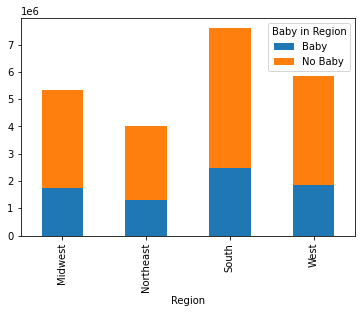

In [14]:
# Baby in Region

baby_region_profile = crosstab_baby_region.plot.bar(stacked= True)
plt.legend(title = 'Baby in Region')

In [16]:
baby_region_profile.figure.savefig(r'/Users/laceymarchment/Desktop/Instacart Basket Analysis/04 Analysis/Visualisations/baby_region_profile.png')

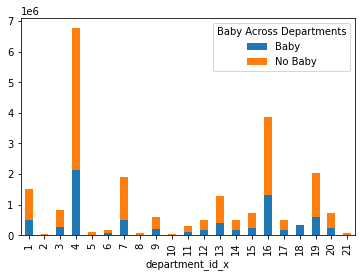

In [17]:
# Baby across departments

baby_departments_profile = crosstab_baby_departments.plot.bar(stacked= True)
plt.legend(title = 'Baby Across Departments')

In [18]:
baby_departments_profile.figure.savefig(r'/Users/laceymarchment/Desktop/Instacart Basket Analysis/04 Analysis/Visualisations/baby_departments_profile.png')

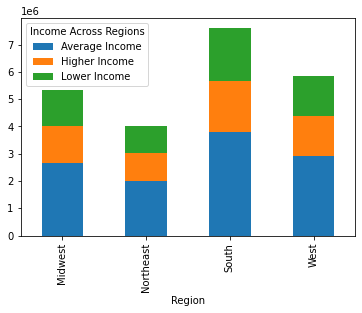

In [20]:
# Income Across Regions

income_region_profile = crosstab_income_region.plot.bar(stacked= True)
plt.legend(title = 'Income Across Regions')

In [21]:
income_region_profile.figure.savefig(r'/Users/laceymarchment/Desktop/Instacart Basket Analysis/04 Analysis/Visualisations/income_region_profile.png')

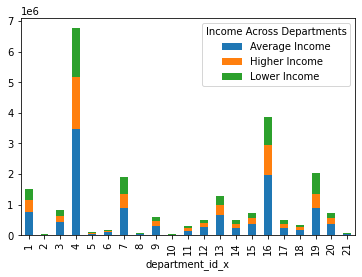

In [22]:
# Income across departments

income_departments_profile = crosstab_income_departments.plot.bar(stacked= True)
plt.legend(title = 'Income Across Departments')

In [23]:
income_departments_profile.figure.savefig(r'/Users/laceymarchment/Desktop/Instacart Basket Analysis/04 Analysis/Visualisations/income_departments_profile.png')

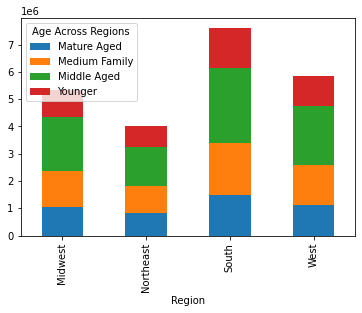

In [24]:
# Age Across Regions

age_region_profile = crosstab_age_region.plot.bar(stacked= True)
plt.legend(title = 'Age Across Regions')

In [25]:
age_region_profile.figure.savefig(r'/Users/laceymarchment/Desktop/Instacart Basket Analysis/04 Analysis/Visualisations/age_region_profile.png')

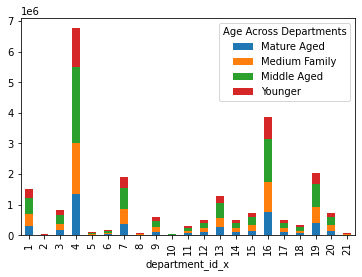

In [26]:
# Age across departments

age_departments_profile = crosstab_age_departments.plot.bar(stacked= True)
plt.legend(title = 'Age Across Departments')

In [27]:
age_departments_profile.figure.savefig(r'/Users/laceymarchment/Desktop/Instacart Basket Analysis/04 Analysis/Visualisations/age_departments_profile.png')

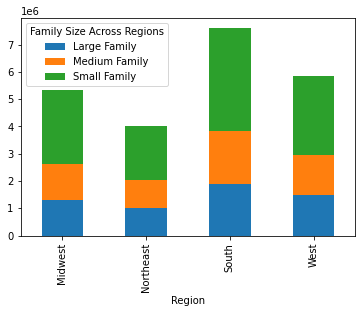

In [28]:
# Family Size Across Regions

family_region_profile = crosstab_family_region.plot.bar(stacked= True)
plt.legend(title = 'Family Size Across Regions')

In [29]:
family_region_profile.figure.savefig(r'/Users/laceymarchment/Desktop/Instacart Basket Analysis/04 Analysis/Visualisations/family_region_profile.png')

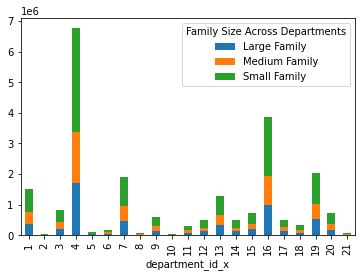

In [30]:
# Family size across departments

family_departments_profile = crosstab_family_departments.plot.bar(stacked= True)
plt.legend(title = 'Family Size Across Departments')

In [31]:
family_departments_profile.figure.savefig(r'/Users/laceymarchment/Desktop/Instacart Basket Analysis/04 Analysis/Visualisations/family_departments_profile.png')

In [32]:
df.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name_x',
       'aisle_id_x', 'department_id_x', 'prices_x', 'exists', 'Unnamed: 0',
       'product_name_y', 'aisle_id_y', 'department_id_y', 'prices_y', 'exist',
       'max_order', 'loyalty_flag', 'Average_spending', 'spending_flag',
       'Median_days_since_prior_order', 'frequency_flag', 'Gender', 'State',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'Region',
       'Activity_Flag', 'baby_profile', 'income_profile', 'income_flag',
       'age_profile', 'Age_Profile', 'family_size'],
      dtype='object')